In [28]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO("../../model/yolov8x-worldv2.pt")  # or select yolov8m/l-world.pt

# Define custom classes
model.set_classes(["cup", "toothbrush", "toilet paper", "tape", "bottle", "tape measure", "stapler", "pen", "scissor", "mouse", "charger", "keyboard", "blue box"])

# Save the model with the defined offline vocabulary
model.save("../../model/custom_yolov8x_worldv2_1.pt")


In [29]:

# Load your custom model
model = YOLO("../../model/custom_yolov8x_worldv2_1.pt")


In [30]:
image_path="/home/fyp/Pictures/TestSeg/clipper_bottle.jpg"
# image_path="/home/fyp/Pictures/TestSeg/bottle_tape.jpg"
# Execute prediction for specified categories on an image
results = model.predict(image_path)


image 1/1 /home/fyp/Pictures/TestSeg/clipper_bottle.jpg: 480x640 1 cup, 1 tape measure, 1 pen, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


In [31]:
# results = model(image_path)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(1)
print(type(results))
print(len(results))
# print(results[0].names)


1
<class 'list'>
1


In [32]:
print(names)
print(xywh)

['cup', 'pen', 'tape measure']
tensor([[3101.7883, 1609.4493, 1043.6641,  910.5564],
        [1364.3167, 1121.7147,  504.0841,  383.3360],
        [1367.1692, 1149.5686,  516.8112,  439.8290]], device='cuda:0')


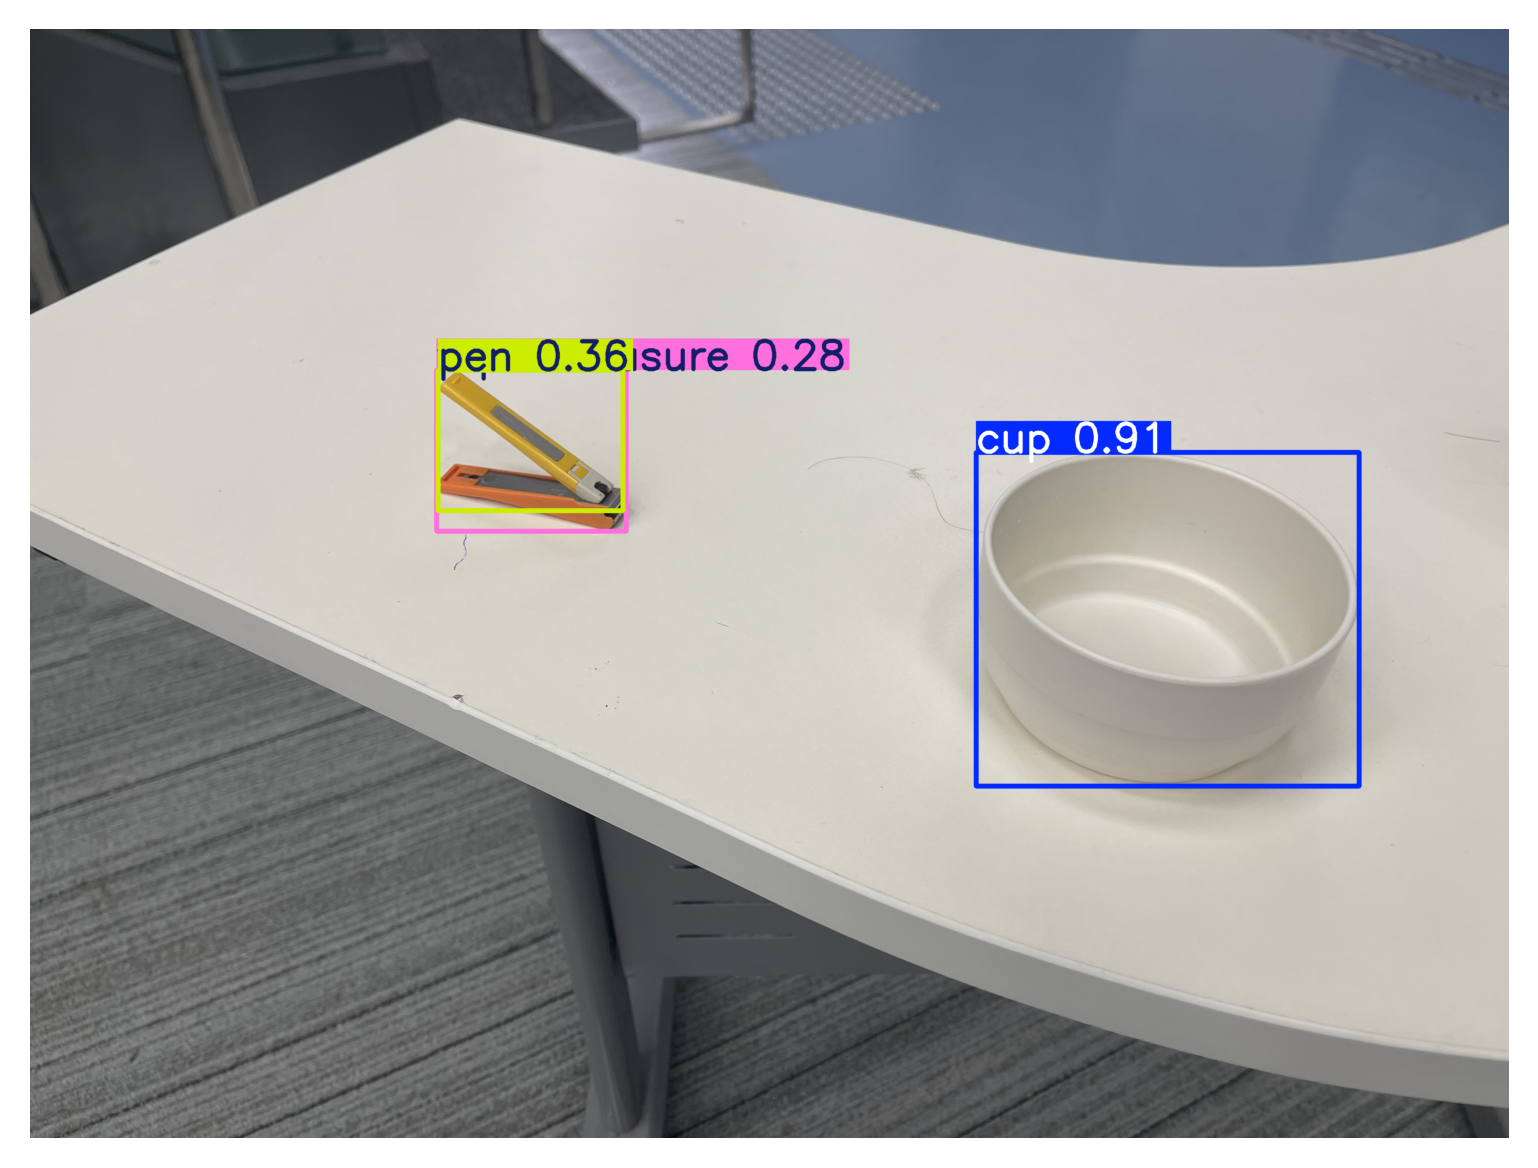

Image width: 4032, Image height: 3024


In [33]:
# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image

# Draw the results on the image
annotated_image = results[0].plot()

# Convert the image to a format suitable for Matplotlib
annotated_image = Image.fromarray(annotated_image[..., ::-1])

# Display the image in the Jupyter Notebook
plt.rcParams['figure.dpi'] = 300
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
# Print the size of the annotated image
width, height = annotated_image.size
print(f"Image width: {width}, Image height: {height}")


In [9]:
xywh

tensor([[2285.0156, 1358.0132,  631.8397,  772.0001],
        [ 789.8627,  680.4965, 1576.8600, 1353.5319],
        [1902.7991,  189.9008,  664.1499,  379.8017]], device='cuda:0')

In [6]:
xywh.cpu().detach().numpy().tolist()

[[1169.9774169921875, 2018.0146484375, 490.12017822265625, 676.6168212890625],
 [2117.96826171875, 1021.9503173828125, 2246.8681640625, 1098.0595703125]]